# Predicting Heart Disease using Machine Learning

This notebook builds an end-to-end heart disease classification model using:
- **Pandas** for data handling
- **NumPy** for numerical operations
- **Matplotlib / Seaborn** for visualizations
- **Scikit-Learn** for modelling and evaluation

Goal:  
Given patient clinical parameters, predict whether the patient has **heart disease (1)** or **no heart disease (0)**.


Step 1 – Import libraries 

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation & tuning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay
)

import datetime

print(f"Notebook last run: {datetime.datetime.now()}")
print(f"NumPy      : {np.__version__}")
print(f"pandas     : {pd.__version__}")
print(f"matplotlib : {matplotlib.__version__}")
print(f"sklearn    : {sklearn.__version__}")


Notebook last run: 2025-12-07 20:46:25.035923
NumPy      : 1.23.5
pandas     : 2.3.1
matplotlib : 3.10.3
sklearn    : 1.7.0


Step 2 – Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv("data/heart disease classification dataset.csv")
df.shape, df.head()


((303, 15),
    Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
 0           0   63    male   3     145.0  233.0    1        0    150.0      0   
 1           1   37    male   2     130.0  250.0    0        1    187.0      0   
 2           2   41  female   1     130.0  204.0    0        0    172.0      0   
 3           3   56    male   1     120.0  236.0    0        1    178.0      0   
 4           4   57  female   0       NaN  354.0    0        1    163.0      1   
 
    oldpeak  slope  ca  thal target  
 0      2.3      0   0     1    yes  
 1      3.5      0   0     2    yes  
 2      1.4      2   0     2    yes  
 3      0.8      2   0     2    yes  
 4      0.6      2   0     2    yes  )

Step 3 –  EDA (exploratory data analysis)


Basic info & stats

In [3]:
# Info: column types + missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [4]:
# Summary statistics for numerical features
df.describe()


,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Target distribution

In [5]:
df['target'].value_counts(), df['target'].value_counts(normalize=True)


(target
 yes    165
 no     138
 Name: count, dtype: int64,
 target
 yes    0.544554
 no     0.455446
 Name: proportion, dtype: float64)

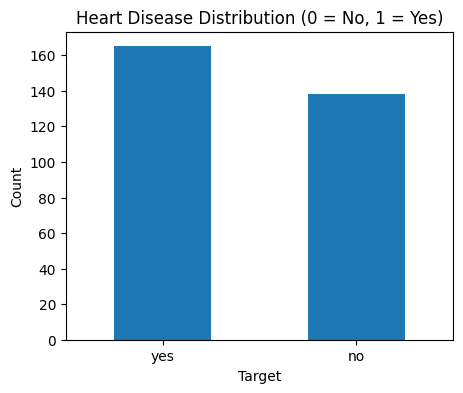

In [6]:
# Plot target distribution
df['target'].value_counts().plot(
    kind='bar',
    figsize=(5, 4)
)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


Step 4 – Some visual EDA


Target vs Sex 

In [7]:
# Cross-tab between target and sex
pd.crosstab(df['target'], df['sex'])


sex,female,male
target,,
no,24,114
yes,72,93


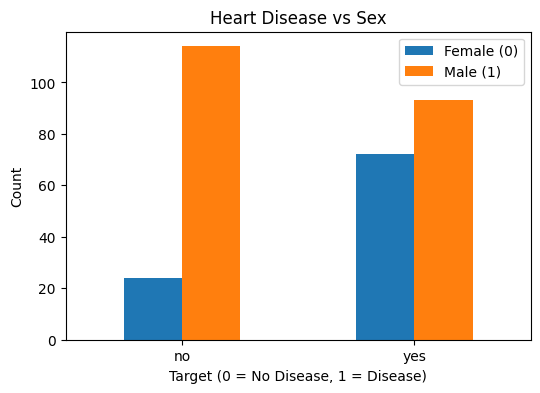

In [8]:
# Plot
pd.crosstab(df['target'], df['sex']).plot(
    kind="bar",
    figsize=(6, 4)
)
plt.title("Heart Disease vs Sex")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.legend(["Female (0)", "Male (1)"])
plt.xticks(rotation=0)
plt.show()


Age vs Max Heart Rate (Scatter)

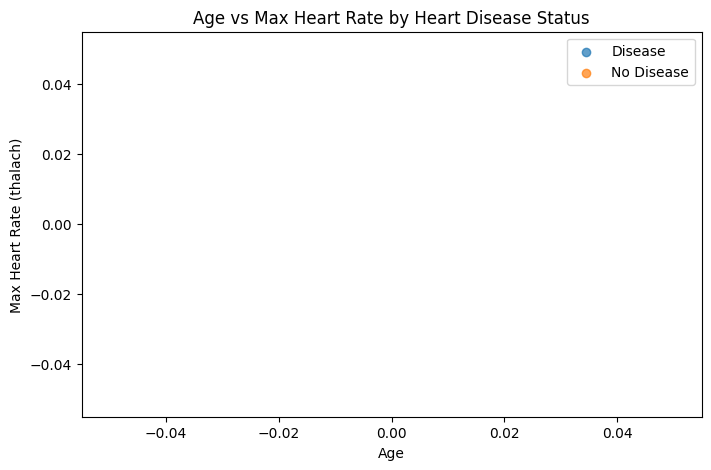

In [9]:
plt.figure(figsize=(8, 5))

# Patients with disease
has_disease = df['target'] == 1
no_disease  = df['target'] == 0

plt.scatter(df.loc[has_disease, 'age'],
            df.loc[has_disease, 'thalach'],
            label="Disease",
            alpha=0.7)

plt.scatter(df.loc[no_disease, 'age'],
            df.loc[no_disease, 'thalach'],
            label="No Disease",
            alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Age vs Max Heart Rate by Heart Disease Status")
plt.legend()
plt.show()


Chest pain vs target

In [10]:
pd.crosstab(df['cp'], df['target'])



target,no,yes
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


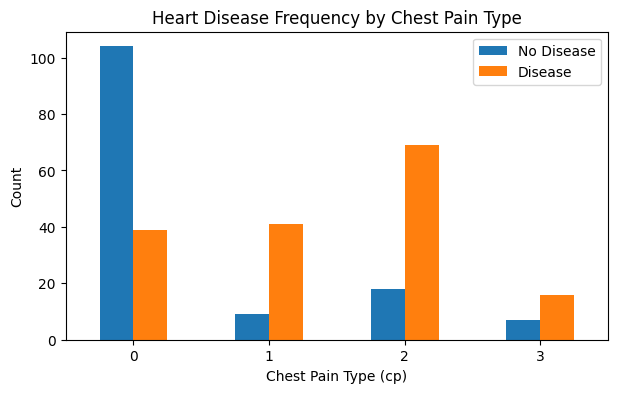

In [11]:
pd.crosstab(df['cp'], df['target']).plot(
    kind="bar",
    figsize=(7, 4)
)
plt.title("Heart Disease Frequency by Chest Pain Type")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()


Correlation heatmap

plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="YlGnBu"
)

plt.title("Correlation Matrix")
plt.show()


Step 5 – Prepare features and labels

In [34]:
# Final features and target
X = df.drop(columns="target")
y = df["target"].values   # or df["target"]


Step 6– Train/Test split

In [35]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, len(y_train), len(y_test)


((242, 14), (61, 14), 242, 61)

Step 7– Try a few baseline models

Define models + helper function

In [14]:
import pandas as pd

# 1. Choose your target column name
target_col = "target"   # ⚠️ change if your label column is named differently

# 2. Split into X (features) and y (target)
y = df[target_col]
X = df.drop(columns=[target_col])

# 3. Find all non-numeric (object) columns in X
cat_cols = X.select_dtypes(include=["object"]).columns
print("Categorical columns:", cat_cols)

# 4. One-hot encode categorical columns → make them numeric
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


Categorical columns: Index(['sex'], dtype='object')


In [15]:
import numpy as np
import pandas as pd

# OPTIONAL: see how many NaNs you have
print(df.isna().sum())

# Fill NaNs separately for numeric and categorical columns
for col in df.columns:
    if df[col].dtype == "object":
        # fill categorical with most frequent value (mode)
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # fill numeric with median
        df[col] = df[col].fillna(df[col].median())


Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64


In [16]:
target_col = "target"   # change if your label column name is different

y = df[target_col]
X = df.drop(columns=[target_col])

# one-hot encode categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "LogReg": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42)
}

def train_and_score(model_dict, X_train, X_test, y_train, y_test):
    scores = {}
    for name, mdl in model_dict.items():
        mdl.fit(X_train, y_train)
        scores[name] = mdl.score(X_test, y_test)
    return scores

base_scores = train_and_score(models, X_train, X_test, y_train, y_test)
base_scores


{'KNN': 0.9836065573770492, 'LogReg': 1.0, 'RandomForest': 1.0}

Compare models visually

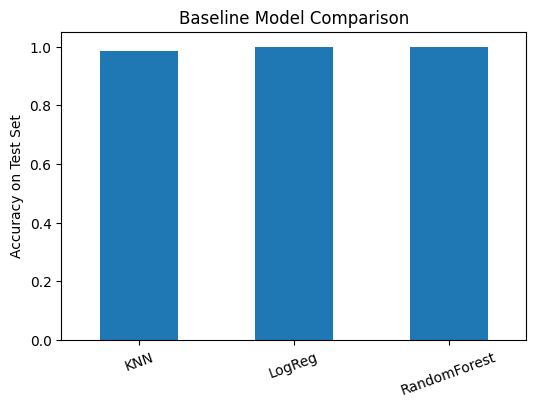

In [17]:
score_df = pd.DataFrame(base_scores, index=["accuracy"]).T
score_df.plot(kind="bar", legend=False, figsize=(6, 4))
plt.title("Baseline Model Comparison")
plt.ylabel("Accuracy on Test Set")
plt.xticks(rotation=20)
plt.show()


Step 8 – Tune KNN by hand

Search different n_neighbors

In [18]:
train_scores = []
test_scores  = []
neighbors_range = range(1, 21)

knn = KNeighborsClassifier()

for k in neighbors_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

max_test_acc = max(test_scores)
k_best = neighbors_range[test_scores.index(max_test_acc)]
print(f"Best KNN test accuracy: {max_test_acc:.3f} at k = {k_best}")


Best KNN test accuracy: 1.000 at k = 1


Plot KNN performance

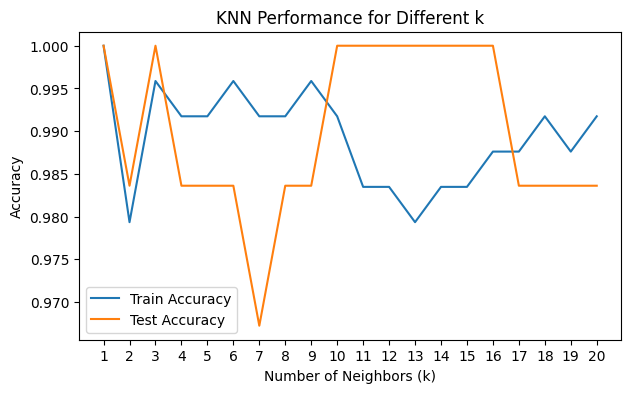

In [19]:
plt.figure(figsize=(7, 4))
plt.plot(neighbors_range, train_scores, label="Train Accuracy")
plt.plot(neighbors_range, test_scores, label="Test Accuracy")
plt.xticks(list(neighbors_range))
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Performance for Different k")
plt.legend()
plt.show()


Step 9 – Hyperparameter tuning with RandomizedSearchCV
 

Logistic Regression hyperparams

In [20]:
log_reg_params = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(
    LogisticRegression(max_iter=1000),
    param_distributions=log_reg_params,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1
)

rs_log_reg.fit(X_train, y_train)

rs_log_reg.best_params_, rs_log_reg.score(X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'solver': 'liblinear', 'C': 29.763514416313132}, 1.0)

Random Forest hyperparams

In [21]:
rf_params = {
    "n_estimators": np.arange(50, 501, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 11, 2)
}

np.random.seed(42)

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1
)

rs_rf.fit(X_train, y_train)

rs_rf.best_params_, rs_rf.score(X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'n_estimators': 100,
  'min_samples_split': 6,
  'min_samples_leaf': 1,
  'max_depth': 5},
 1.0)

Step 10– Fine-tune Logistic Regression with GridSearchCV

In [22]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

gs_log_reg = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid=log_reg_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
)

gs_log_reg.fit(X_train, y_train)

gs_log_reg.best_params_, gs_log_reg.score(X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': 29.763514416313132, 'solver': 'liblinear'}, 1.0)

Step 11 – Evaluation beyond accuracy

Predictions on test set

In [23]:
final_model = gs_log_reg  # best Logistic Regression from grid search

y_pred = final_model.predict(X_test)

y_pred[:10], y_test[:10]


(array(['no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes'],
       dtype=object),
 179     no
 228     no
 111    yes
 246     no
 60     yes
 9      yes
 119    yes
 223     no
 268     no
 33     yes
 Name: target, dtype: object)

ROC curve & AUC

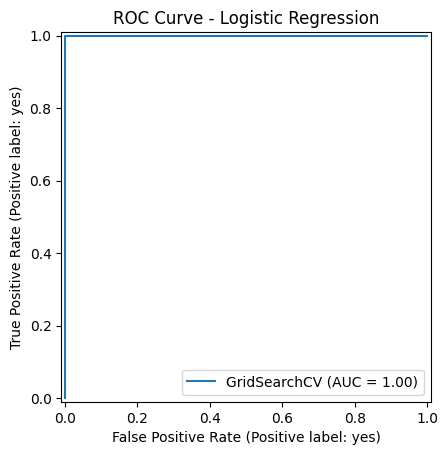

In [25]:
RocCurveDisplay.from_estimator(
    final_model,
    X_test,
    y_test
)
plt.title("ROC Curve - Logistic Regression")
plt.show()


Confusion matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[29,  0],
       [ 0, 32]], dtype=int64)

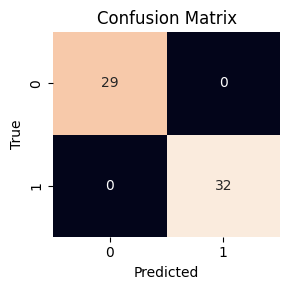

In [27]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(3, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cbar=False
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm)


Classification report

In [28]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       1.00      1.00      1.00        29
         yes       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



Cross-validated metrics

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import pandas as pd

# Best params from GridSearchCV
best_C = gs_log_reg.best_params_["C"]
best_solver = gs_log_reg.best_params_["solver"]

# Final Logistic Regression model
clf = LogisticRegression(
    C=best_C,
    solver=best_solver,
    max_iter=1000
)

# Tell sklearn that the positive class is "yes"
prec_scorer = make_scorer(precision_score, pos_label="yes")
rec_scorer  = make_scorer(recall_score,    pos_label="yes")
f1_scorer   = make_scorer(f1_score,        pos_label="yes")

# ---- Cross-validated metrics ----
# Accuracy
cv_acc  = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
# Precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring=prec_scorer)
# Recall
cv_rec  = cross_val_score(clf, X, y, cv=5, scoring=rec_scorer)
# F1
cv_f1   = cross_val_score(clf, X, y, cv=5, scoring=f1_scorer)

metrics_summary = pd.DataFrame({
    "Accuracy":  [cv_acc.mean()],
    "Precision": [cv_prec.mean()],
    "Recall":    [cv_rec.mean()],
    "F1":        [cv_f1.mean()]
})

metrics_summary


,Accuracy,Precision,Recall,F1
0,0.917104,0.960976,0.89697,0.908991


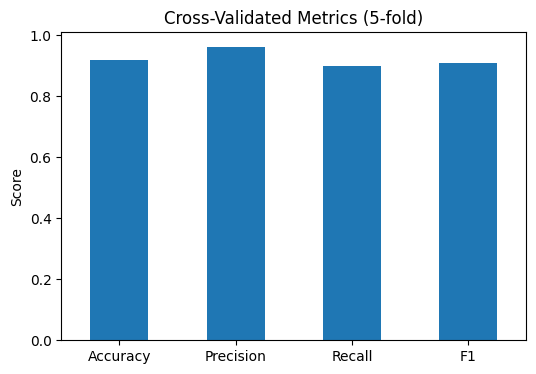

In [30]:
metrics_summary.T.plot(
    kind="bar",
    legend=False,
    figsize=(6, 4)
)
plt.title("Cross-Validated Metrics (5-fold)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


Step 12 – Feature importance (Logistic Regression coefficients)

Fit on full training set

In [31]:
clf.fit(X_train, y_train)

clf.coef_


array([[-0.96890696,  0.71223439, -0.20385435,  0.47521533, -0.06498216,
        -0.02455635,  1.70159434,  0.48467561,  0.04237307, -3.45656166,
         0.86233553, -0.2026704 ,  0.11586345, -0.10857859]])

Map coefficients to feature names

In [32]:
feature_importance = pd.Series(
    clf.coef_[0],
    index=X.columns
).sort_values()

feature_importance


oldpeak      -3.456562
Unnamed: 0   -0.968907
cp           -0.203854
ca           -0.202670
sex_male     -0.108579
chol         -0.064982
fbs          -0.024556
exang         0.042373
thal          0.115863
trestbps      0.475215
thalach       0.484676
age           0.712234
slope         0.862336
restecg       1.701594
dtype: float64

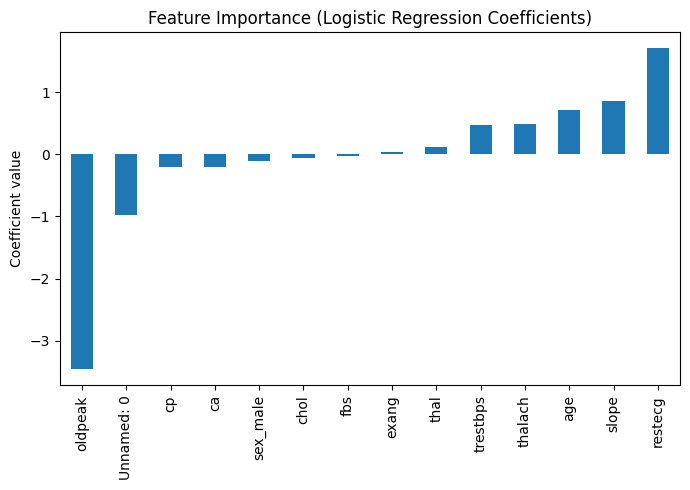

In [33]:
plt.figure(figsize=(7, 5))
feature_importance.plot(kind="bar")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient value")
plt.tight_layout()
plt.show()
